# Importar datos

In [1]:
#Importar paquetes necesarios
#Pandas
import pandas as pd
import numpy as np
#Seaborn visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt
#Crear las variables de entrenamiento
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Paquetes para seleccion de variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression #f_regressiones adecuado para problemas de regresión lineal, trabajando con datos numéricos
#Crear el modelo lineal
from sklearn.linear_model import LinearRegression
#Crear medidas de error
from sklearn.metrics import mean_squared_error, r2_score
#paquete para ejecutar prueba durbin-whatson
from statsmodels.stats.stattools import durbin_watson
#paquete para ejecutar prueba white
from statsmodels.stats.diagnostic import het_white
#Paquete para crear el grafico de probabilidad de los residuos
import scipy.stats as stats

In [2]:
Ventas= pd.read_csv(r'C:\Users\juanm\Desktop\Provisional\Store Sales Forecasting\train.csv')
Ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [3]:
Ventas=Ventas.groupby(['Store','Date']).aggregate({'Weekly_Sales':'sum'}).reset_index()

In [9]:
Ventas['Date']=Ventas['Date'].astype('datetime64')

In [10]:
Ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 150.9 KB


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

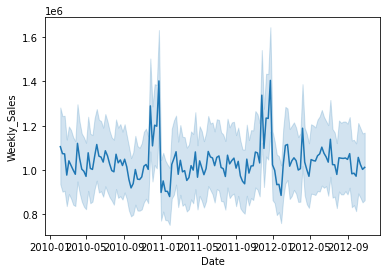

In [21]:
sns.lineplot(Ventas,x='Date',y='Weekly_Sales')

In [13]:
Ventas['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Weekly_Sales'>

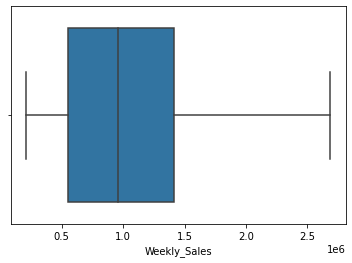

In [20]:
sns.boxplot(Ventas,x='Weekly_Sales')

In [19]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
Q1 = Ventas['Weekly_Sales'].quantile(q=.25)
Q3 = Ventas['Weekly_Sales'].quantile(q=.75)
IQR = Q3 - Q1 # Es lo mismo que Q3 - Q1
# Solo mantenemos filas que esten dentro de 1.5*IQR de Q1 y Q3
Ventas=Ventas[~((Ventas['Weekly_Sales'] < (Q1-1.5*IQR)) | (Ventas['Weekly_Sales'] > (Q3+1.5*IQR)))]

In [22]:
tiendas= pd.read_csv(r'C:\Users\juanm\Desktop\Provisional\Store Sales Forecasting\stores.csv')
tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [25]:
datosTiendas= pd.read_csv(r'C:\Users\juanm\Desktop\Provisional\Store Sales Forecasting\features.csv')
datosTiendas['Date']=datosTiendas['Date'].astype('datetime64')
datosTiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [26]:
datosVentas=Ventas.merge(right=tiendas,on='Store',how='left').merge(right=datosTiendas,on=['Store','Date'],how='inner')
datosVentas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 6400
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6401 non-null   int64         
 1   Date          6401 non-null   datetime64[ns]
 2   Weekly_Sales  6401 non-null   float64       
 3   Type          6401 non-null   object        
 4   Size          6401 non-null   int64         
 5   Temperature   6401 non-null   float64       
 6   Fuel_Price    6401 non-null   float64       
 7   MarkDown1     2266 non-null   float64       
 8   MarkDown2     1623 non-null   float64       
 9   MarkDown3     2032 non-null   float64       
 10  MarkDown4     1951 non-null   float64       
 11  MarkDown5     2281 non-null   float64       
 12  CPI           6401 non-null   float64       
 13  Unemployment  6401 non-null   float64       
 14  IsHoliday     6401 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64

In [27]:
datosVentas.corr()['Weekly_Sales'].sort_values()

Store          -0.332881
Unemployment   -0.104298
CPI            -0.069617
Temperature    -0.044340
Fuel_Price      0.018189
IsHoliday       0.025358
MarkDown2       0.111329
MarkDown3       0.147439
MarkDown4       0.183964
MarkDown5       0.317541
MarkDown1       0.348242
Size            0.824301
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

In [28]:
datosVentas['Weekly_Sales'].describe()

count    6.401000e+03
mean     1.036130e+06
std      5.451961e+05
min      2.099862e+05
25%      5.517431e+05
50%      9.572983e+05
75%      1.414565e+06
max      2.685352e+06
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='MarkDown1', ylabel='Weekly_Sales'>

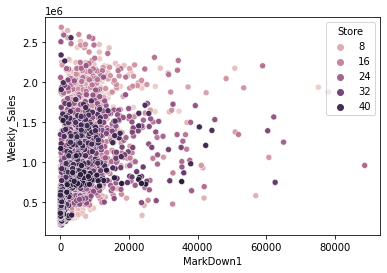

In [45]:
sns.scatterplot(datosVentas,x='MarkDown1',y='Weekly_Sales')

<AxesSubplot:xlabel='MarkDown5', ylabel='Weekly_Sales'>

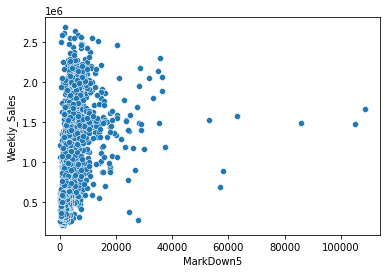

In [43]:
sns.scatterplot(datosVentas,x='MarkDown5',y='Weekly_Sales')

# Implementar modelo

In [29]:
datosVentas2=datosVentas[['Size','MarkDown1', 'MarkDown5','Store','Weekly_Sales']].fillna(value=0)

In [30]:
#Crear las variables numericas con todo el dataframe 
X=datosVentas2[['Size','MarkDown1', 'MarkDown5','Store']]
y=datosVentas2['Weekly_Sales']

In [31]:
#Crear el modelo lineal
mimodelo=LinearRegression()

In [32]:
#Ajustar el modelo con validacion cruzada
resultadosvalidacioncruzada = cross_val_score(mimodelo, X, y, cv=5)
#Imprimir resultados de la validacion cruzada
print("%0.2f accuracy with a standard deviation of %0.2f" % (resultadosvalidacioncruzada.mean(), resultadosvalidacioncruzada.std()))

0.55 accuracy with a standard deviation of 0.10


In [33]:
#Ajustar el modelo
mimodelo.fit(X,y)

LinearRegression()

In [34]:
#Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#Calcular los valores predichos
valorespred=mimodelo.predict(X_test)

Text(0, 0.5, 'Predicted Labels')

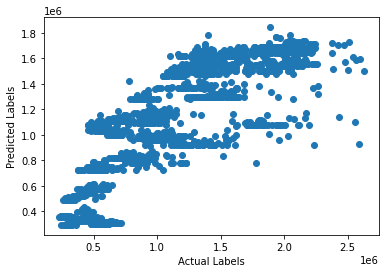

In [35]:
# Plot predicted vs actual
plt.scatter(y_test, valorespred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

In [36]:
#Crear medidas de error
#Root Mean Square Error (RMSE). Se obtiene así una métrica absoluta en la misma unidad que la etiqueta. 
###Cuanto menor sea el valor, mejor será el modelo
rmse = np.sqrt(mean_squared_error(y_test, valorespred))
print("RMSE:", rmse)
#Coefficient of Determination. Representa qué parte de la varianza entre los valores predichos y reales de las etiquetas es capaz de explicar el modelo.
###cuanto mayor sea el valor, mejor será el ajuste del modelo.
r2 = r2_score(y_test, valorespred)
print("R2:", r2)

RMSE: 304530.0238173788
R2: 0.7076574634146925


# Validacion del modelo

In [37]:
#Obtener los resisudales
# Obtener los residuales
residuals = y_test - valorespred

In [38]:
#Se realiza prueba de Durbin-Watson para probar independencia
# El supuesto es que los residuos son independientes
durbinresultado=durbin_watson(residuals)
print("El valor de la prueba es: ",durbinresultado)
if durbinresultado>=1.5 and durbinresultado<=2:
    print("Existe independencia en los residuos, PRUEBA SUPERADA")
else:
    print("No existe independencia en los residuos, PRUEBA NO SUPERADA")

El valor de la prueba es:  1.9033967617703869
Existe independencia en los residuos, PRUEBA SUPERADA


In [39]:
# Corremos test con datos homoscedásticos:
# El supuesto es que los residuos son homoscedásticos
columnaDeUnos = np.ones(len(X_test))
X_test['Intercepto'] = columnaDeUnos
white_test = het_white(residuals,X_test)
titulos = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(titulos, white_test)))
if white_test[1] < 0.05:
    print("Heterocedasticidad detectada, PRUEBA NO SUPERADA")
else:
    print("No se detectó heterocedasticidad, PRUEBA SUPERADA")

{'Test Statistic': 219.83538517093092, 'Test Statistic p-value': 4.7486198561656245e-39, 'F-Statistic': 17.593251809601192, 'F-Test p-value': 1.2570707487865007e-41}
Heterocedasticidad detectada, PRUEBA NO SUPERADA


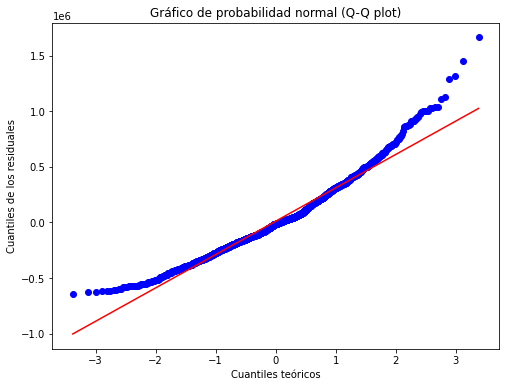

In [40]:
# Test de normalidad de los residuos
# El supuesto es que los residuos se distribuyen de forma normal
# Gráfico de probabilidad normal (Q-Q plot)
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los residuales')
plt.title('Gráfico de probabilidad normal (Q-Q plot)')
plt.show()

<AxesSubplot:>

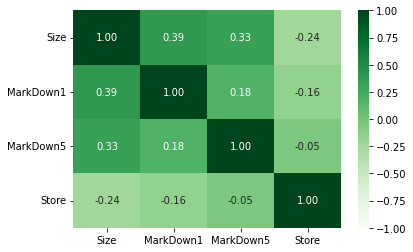

In [41]:
# Test de Multicolinealidad
# Validar que no existe correlacion entre variables de explicativas.
# Heatmap de correlaciones
sns.heatmap(data = datosVentas[['Size','MarkDown1', 'MarkDown5','Store']].corr(), annot=True, fmt=".2f", vmax=1, vmin=-1, cmap="Greens")